In [86]:
import numpy as np
import aniposelib
import toml
import pandas as pd
from aniposelib.boards import CharucoBoard, Checkerboard
from aniposelib.cameras import Camera, CameraGroup
from aniposelib.utils import load_pose2d_fnames

In [87]:
vidnames = [['camera-1_new_position_20221107.mp4'],
            ['camera-2_new_position_20221107.mp4'],
            ['camera-3_new_position_20221107.mp4']]

cam_names = ['1', '2', '3']

n_cams = len(vidnames)

board = Checkerboard(8, 6,
                     square_length=1, # here, in mm but any unit works
                     manually_verify=False)


# the videos provided are fisheye, so we need the fisheye option
cgroup = CameraGroup.from_names(cam_names, fisheye=False)



In [88]:
# this will take about 15 minutes (mostly due to detection)
# it will detect the charuco board in the videos,
# then calibrate the cameras based on the detections, using iterative bundle adjustment
cgroup.calibrate_videos(vidnames, board)

# if you need to save and load
# example saving and loading for later
cgroup.dump('calibration.toml')

camera-1_new_position_20221107.mp4


100%|███████████████████████████████| 811/811 [01:06<00:00, 12.25it/s]


651 boards detected
camera-2_new_position_20221107.mp4


100%|███████████████████████████████| 811/811 [01:39<00:00,  8.12it/s]


618 boards detected
camera-3_new_position_20221107.mp4


100%|███████████████████████████████| 811/811 [00:53<00:00, 15.26it/s]


763 boards detected
defaultdict(<class 'int'>,
            {('1', '2'): 470,
             ('1', '3'): 604,
             ('2', '1'): 470,
             ('2', '3'): 554,
             ('3', '1'): 604,
             ('3', '2'): 554})
error:  102.36242081072825
n_samples: 100
{(0, 1): (2857, array([ 75.09805126, 131.03538843])),
 (0, 2): (2857, array([ 57.94181392, 101.68819252])),
 (1, 2): (2857, array([ 63.07384226, 142.77367714]))}
error: 102.61, mu: 75.1, ratio: 0.194
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.1040e+32                                    2.96e+16    
       1              2         1.7065e+06      1.10e+32       7.43e+15       8.85e+07    
       2              5         9.1860e+05      7.88e+05       7.51e+02       1.71e+07    
       3              6         7.1933e+05      1.99e+05       4.68e+02       4.91e+06    
       4              8         6.5454e+05      6.48e+04       1.75e+02    

       3              4         1.0012e+05      8.03e+03       5.56e+01       2.95e+04    
       4              5         9.8608e+04      1.51e+03       2.42e+01       8.80e+03    
       5              6         9.8337e+04      2.71e+02       8.63e+00       5.42e+03    
       6              7         9.8299e+04      3.76e+01       3.66e+00       2.14e+03    
       7              8         9.8298e+04      1.56e+00       2.64e+00       2.09e+03    
`ftol` termination condition is satisfied.
Function evaluations 8, initial cost 1.3997e+06, final cost 9.8298e+04, first-order optimality 2.09e+03.
{(0, 1): (2861, array([ 23.93484784, 151.86490968])),
 (0, 2): (2861, array([ 12.48233706, 109.17317109])),
 (1, 2): (2861, array([ 25.50086178, 151.00332828]))}
error: 79.31, mu: 25.5, ratio: 0.169
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.5532e+06                                    3.83e+06    
       1        

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.4003e+06                                    1.89e+06    
       1              2         1.0980e+05      1.29e+06       4.54e+02       6.00e+06    
       2              3         6.1343e+04      4.85e+04       1.65e+02       1.30e+06    
       3              4         5.8427e+04      2.92e+03       2.86e+02       3.77e+06    
       4              5         5.1254e+04      7.17e+03       2.10e+01       1.01e+06    
       5              6         5.1057e+04      1.97e+02       2.32e+01       1.88e+05    
       6              7         5.1015e+04      4.19e+01       1.16e+01       2.42e+04    
       7              8         5.1010e+04      5.57e+00       1.82e+01       4.35e+04    
       8              9         5.1007e+04      2.07e+00       2.39e+00       9.39e+03    
`ftol` termination condition is satisfied.
Function evaluations 9, initial cost 1.4003e+06

In [89]:
## example of loading calibration from a file
## you can also load the provided file if you don't want to wait 15 minutes
cgroup = CameraGroup.load('calibration.toml')


In [90]:
## example triangulation without filtering, should take < 15 seconds
date_tgt = '20221128'
animal1 = 'Eddie'
animal2 = 'Sparkle'
singlecam_ana_type = "DLC_dlcrnetms5_marmoset_tracking_with_middle_cameraSep1shuffle1_150000"

twocamera_videos_cam12 = "/gpfs/gibbs/pi/jadi/VideoTracker_SocialInter/test_video_cooperative_task_3d/20221128_Eddie_Sparkle_camera12/"
twocamera_videos_cam23 = "/gpfs/gibbs/pi/jadi/VideoTracker_SocialInter/test_video_cooperative_task_3d/20221128_Eddie_Sparkle_camera23/"

bodyparts_cam1_cam12 = twocamera_videos_cam12+date_tgt+"_"+animal1+"_"+animal2+"_camera-1"+singlecam_ana_type+"_el_filtered.h5"
bodyparts_cam2_cam12 = twocamera_videos_cam12+date_tgt+"_"+animal1+"_"+animal2+"_camera-2"+singlecam_ana_type+"_el_filtered.h5"
bodyparts_cam3_cam23 = twocamera_videos_cam23+date_tgt+"_"+animal1+"_"+animal2+"_camera-3"+singlecam_ana_type+"_el_filtered.h5"

# dodson h5 files
bodyparts_cam1_cam12_dodson = twocamera_videos_cam12+date_tgt+"_"+animal1+"_"+animal2+"_camera-1"+singlecam_ana_type+"_el_filtered_dodson.h5"
bodyparts_cam2_cam12_dodson = twocamera_videos_cam12+date_tgt+"_"+animal1+"_"+animal2+"_camera-2"+singlecam_ana_type+"_el_filtered_dodson.h5"
bodyparts_cam3_cam23_dodson = twocamera_videos_cam23+date_tgt+"_"+animal1+"_"+animal2+"_camera-3"+singlecam_ana_type+"_el_filtered_dodson.h5"

# scorch h5 files
bodyparts_cam1_cam12_scorch = twocamera_videos_cam12+date_tgt+"_"+animal1+"_"+animal2+"_camera-1"+singlecam_ana_type+"_el_filtered_scorch.h5"
bodyparts_cam2_cam12_scorch = twocamera_videos_cam12+date_tgt+"_"+animal1+"_"+animal2+"_camera-2"+singlecam_ana_type+"_el_filtered_scorch.h5"
bodyparts_cam3_cam23_scorch = twocamera_videos_cam23+date_tgt+"_"+animal1+"_"+animal2+"_camera-3"+singlecam_ana_type+"_el_filtered_scorch.h5"


# cam1 dodson
bodyparts_cam1_cam12_data = pd.read_hdf(bodyparts_cam1_cam12)
bodyparts_cam1_cam12_dodson_data = {}
bodyparts_cam1_cam12_dodson_data[singlecam_ana_type]=bodyparts_cam1_cam12_data.loc[:,(singlecam_ana_type,'dodson')]
bodyparts_cam1_cam12_dodson_data=pd.concat(bodyparts_cam1_cam12_dodson_data, axis=1)
bodyparts_cam1_cam12_dodson_data.to_hdf(bodyparts_cam1_cam12_dodson,key='tracks')

# cam2 dodson
bodyparts_cam2_cam12_data = pd.read_hdf(bodyparts_cam2_cam12)
bodyparts_cam2_cam12_dodson_data = {}
bodyparts_cam2_cam12_dodson_data[singlecam_ana_type]=bodyparts_cam2_cam12_data.loc[:,(singlecam_ana_type,'dodson')]
bodyparts_cam2_cam12_dodson_data=pd.concat(bodyparts_cam2_cam12_dodson_data, axis=1)
bodyparts_cam2_cam12_dodson_data.to_hdf(bodyparts_cam2_cam12_dodson,key='tracks')

# cam3 dodson
bodyparts_cam3_cam23_data = pd.read_hdf(bodyparts_cam3_cam23)
bodyparts_cam3_cam23_dodson_data = {}
bodyparts_cam3_cam23_dodson_data[singlecam_ana_type]=bodyparts_cam3_cam23_data.loc[:,(singlecam_ana_type,'dodson')]
bodyparts_cam3_cam23_dodson_data=pd.concat(bodyparts_cam3_cam23_dodson_data, axis=1)
bodyparts_cam3_cam23_dodson_data.to_hdf(bodyparts_cam3_cam23_dodson,key='tracks')



In [91]:
## example triangulation without filtering, should take < 15 seconds
fname_dict = {
    '1': bodyparts_cam1_cam12_dodson,
    '2': bodyparts_cam2_cam12_dodson,
    '3': bodyparts_cam3_cam23_dodson,
}

d = load_pose2d_fnames(fname_dict, cam_names=cgroup.get_names())

score_threshold = 0.5

n_cams, n_points, n_joints, _ = d['points'].shape
points = d['points']
scores = d['scores']

bodyparts = d['bodyparts']

# remove points that are below threshold
points[scores < score_threshold] = np.nan

points_flat = points.reshape(n_cams, -1, 2)
scores_flat = scores.reshape(n_cams, -1)

p3ds_flat = cgroup.triangulate(points_flat, progress=True)
reprojerr_flat = cgroup.reprojection_error(p3ds_flat, points_flat, mean=True)

p3ds = p3ds_flat.reshape(n_points, n_joints, 3)
reprojerr = reprojerr_flat.reshape(n_points, n_joints)


100%|████████████████████████| 127260/127260 [18:06<00:00, 117.11it/s]


<IPython.core.display.Javascript object>


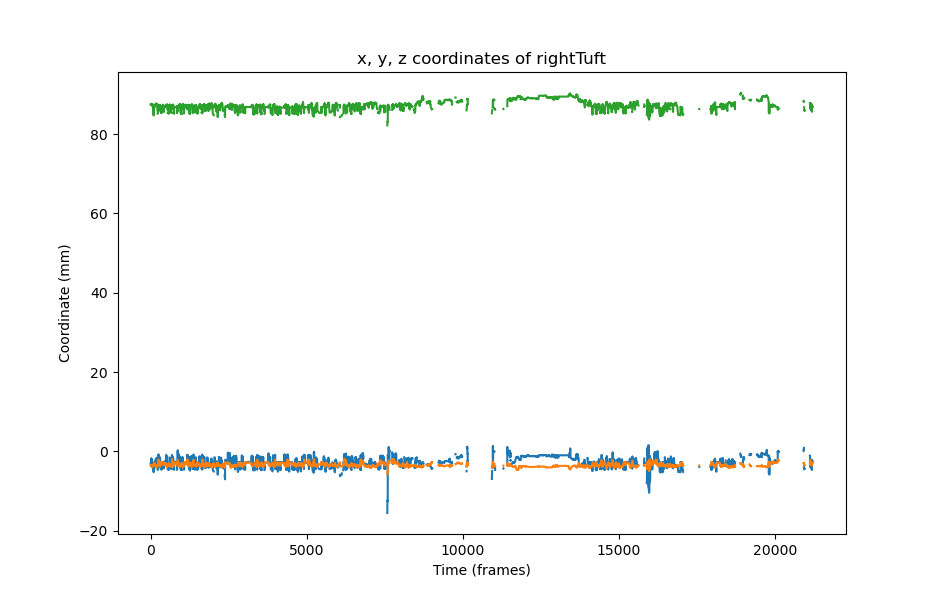

Text(0.5, 1.0, 'x, y, z coordinates of rightTuft')

In [93]:
# plot the x, y, z coordinates of joint 0

import matplotlib.pyplot as plt
%matplotlib notebook

plt.figure(figsize=(9.4, 6))
plt.plot(p3ds[:, 0, 0])
plt.plot(p3ds[:, 0, 1])
plt.plot(p3ds[:, 0, 2])
plt.xlabel("Time (frames)")
plt.ylabel("Coordinate (mm)")
plt.title("x, y, z coordinates of {}".format(bodyparts[0]))

<IPython.core.display.Javascript object>


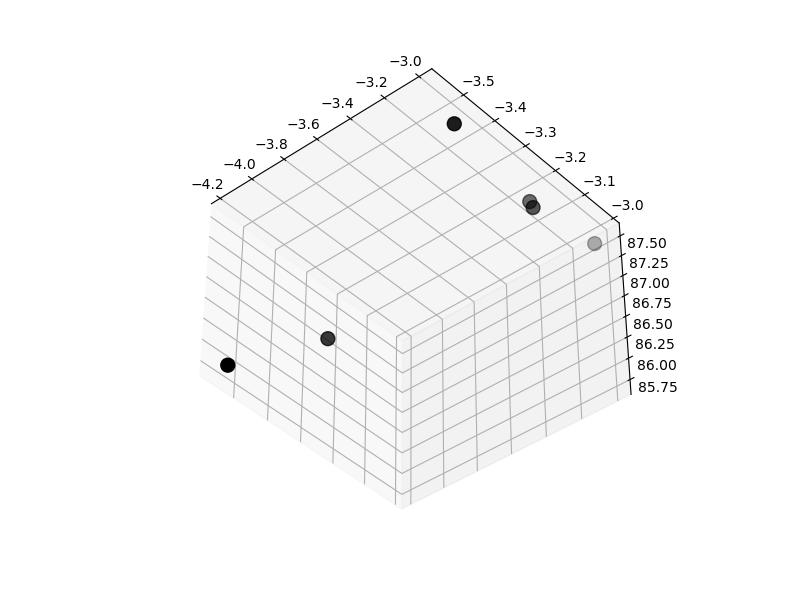

KeyError: 'MCP1'

In [94]:
## plot the first frame in 3D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import get_cmap
%matplotlib notebook

def connect(ax, points, bps, bp_dict, color):
    ixs = [bp_dict[bp] for bp in bps]
    return ax.plot(points[ixs, 0], points[ixs, 1], points[ixs, 2], color=color)

def connect_all(ax, points, scheme, bodyparts, cmap=None):
    if cmap is None:
        cmap = get_cmap('tab10')
    bp_dict = dict(zip(bodyparts, range(len(bodyparts))))
    lines = []
    for i, bps in enumerate(scheme):
        line = connect(ax, points, bps, bp_dict, color=cmap(i)[:3])
        lines.append(line)
    return lines

## scheme for the hand
scheme = [
   ["MCP1", "PIP1", "tip1"],
   ["MCP2", "PIP2", "DIP2", "tip2"],
   ["MCP3", "PIP3", "DIP3", "tip3"],
   ["MCP4", "PIP4", "DIP4", "tip4"],
   ["MCP5", "PIP5", "DIP5", "tip5"],
   ["base", "MCP1", "MCP2", "MCP3", "MCP4", "MCP5", "base"]
 ]

framenum = 0
p3d = p3ds[framenum]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(p3d[:,0], p3d[:,1], p3d[:,2], c='black', s=100)
connect_all(ax, p3d, scheme, bodyparts)
